# Defining graph


In [2]:
!pip install yfinance
!pip install bs4
!pip install plotly

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [18]:
def clean_revenue_data(revenue_data):
    revenue_data['Revenue'] = revenue_data['Revenue'].replace(r'[\$,]', '', regex=True).astype(float)
    return revenue_data


def make_graph(stock_data, revenue_data, stock):
    # Clean the revenue data
    revenue_data = clean_revenue_data(revenue_data)
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data['Date']), y=stock_data['Close'].astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data['Year']), y=revenue_data['Revenue'], name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()


# 1 Extracting Tesla Stock Data Using yfinance


In [19]:
tesla=yf.Ticker("TSLA")
tesla_data=tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# 2 Extracting Tesla Revenue Data Using Webscraping

In [20]:
url = 'https://en.wikipedia.org/wiki/Tesla,_Inc.'
response = requests.get(url)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')

tables = soup.find_all('table', {'class': 'wikitable'})

table_index = 3  

data = []

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if col:  
        Year = col[0].text.strip()  
        Revenue = col[1].text.strip().replace("$", "").replace(",", "")  
        data.append({"Year": Year, "Revenue": Revenue})

Tesla_revenue = pd.DataFrame(data)

print(Tesla_revenue)


    Year Revenue
0   2005       0
1   2006       0
2   2007   0.073
3   2008      15
4   2009     112
5   2010     117
6   2011     204
7   2012     413
8   2013    2013
9   2014    3198
10  2015    4046
11  2016    7000
12  2017   11759
13  2018   21461
14  2019   24578
15  2020   31536
16  2021   53823
17  2022   81462
18  2023   96773


# 3 Extraxting Gamestop Stock Data Using Yfinance

In [21]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


#  4 Extracting GameStop Revenue Data Using Webscraping

In [25]:
url = 'https://en.wikipedia.org/wiki/GameStop'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', {'class': 'wikitable'})

data = []
rows = table.find_all('tr')
for row in rows[1:]:  
    cells = row.find_all('td')
    if len(cells) > 1:  
        year = cells[0].text.strip()
        revenue = cells[11].text.strip()
        data.append({"Year": year, "Revenue": revenue})

Gamestop_revenue = pd.DataFrame(data)
print(Gamestop_revenue)


    Year   Revenue
0   1999    $223.7
1   2000    $756.7
2   2001  $1,121.1
3   2002  $1,352.8
4   2003  $1,578.8
5   2004  $1,842.8
6   2005  $3,091.8
7   2006  $5,318.9
8   2007  $7,094.0
9   2008  $8,805.9
10  2009  $9,078.8
11  2010  $9,473.7
12  2011  $9,550.5
13  2012  $8,886.7
14  2013  $9,039.5
15  2014  $9,296.0
16  2015  $9,363.8
17  2016  $8,607.9
18  2017  $9,224.6
19  2018  $8,285.3
20  2019  $6,466.0
21  2020  $5,089.8
22  2021  $6,010.7
23  2022  $5,927.2
24  2023  $5,272.8


# 5 Tesla Stock and Revenue Dashboard

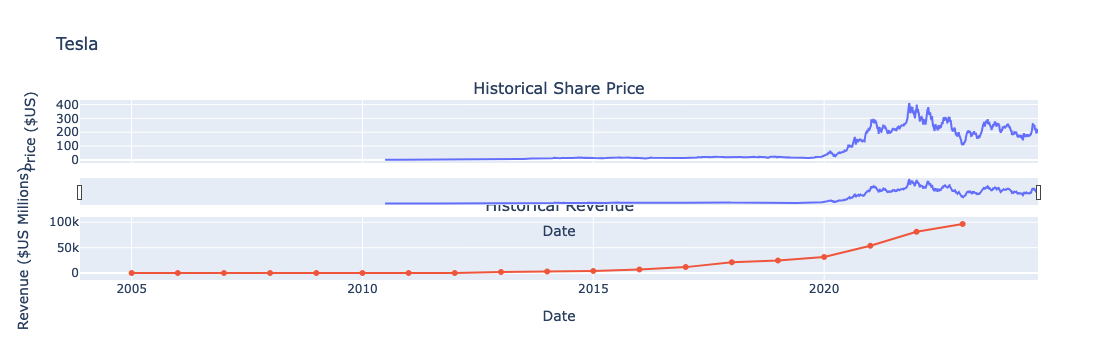

In [23]:
make_graph(tesla_data, Tesla_revenue, 'Tesla')

# 6 Gamestop Stock and Revenue Dashboard

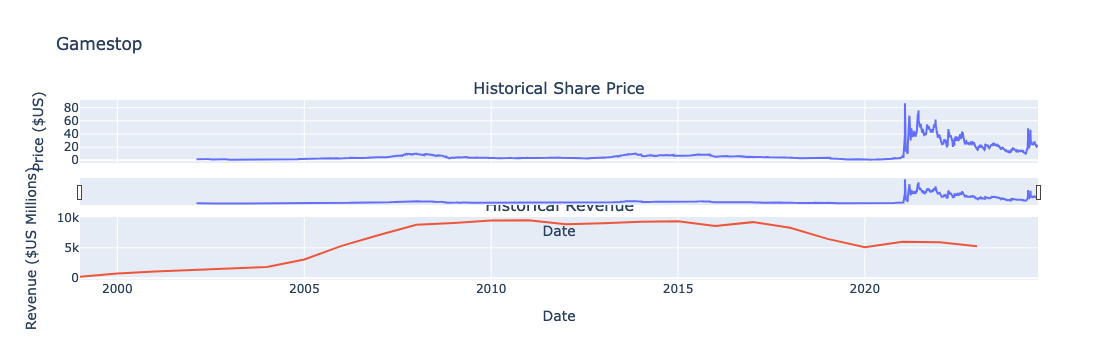

In [24]:
make_graph(gamestop_data, Gamestop_revenue, 'Gamestop')